# Stochastic Gradient Boosting - nutcracker
Conny Lin | June 17, 2020

## Standard set up scripts
### local computers


In [3]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
import brainstation_capstone
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.vs.plots import hyperparameterplot
# import standard libraries
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# import local libraries using host specific paths
# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

getting host computer specific paths
last ran on: 2020-06-21 10:38:57.921064 PT
loading 4 files
loading completed


### google colab

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# import functions
import os, time, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define functions
def hyperparameter_plot_google_colab(hyperparameter_list, train_score_list, test_score_list, hyperparameter_name, xscale):
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    plt.figure()
    plt.plot(hyperparameter_list, train_acc, color='blue', label='train')
    plt.plot(hyperparameter_list, test_acc, color='red', label='test')
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.xscale(xscale)
    plt.legend()
    plt.show()

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, hyperparameter_name='', xscale, titlename=''):
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.xscale(xscale)
    plt.legend()
    plt.show()

class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')
    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()
    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    def session_end(self):
        self.end = time.time()
    def get_time(self):
        print(f'total time: {(self.end - self.start)/60:.3f} min')
        return self.session_times


In [ ]:
# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(file_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(X_train.shape)
# report time run
print(f'last ran on: {datetime.datetime.now()} PT')

## run on google colab

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
import pandas as pd
import numpy as np
import os

# load array
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')

# print the array
print(X.shape)

(1600000, 21)



run one untune model

In [ ]:
# untune model
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()
model = GradientBoostingClassifier(random_state=318, verbose=3)
model.fit(X,y)
train_score = model.score(X, y)
print(f'train score: {train_score}')
test_score = model.score(X_test, y_test)
print(f'test score: {test_score}')
print(f'took {(time.time()-start_time)/60:.2f}min')

      Iter       Train Loss   Remaining Time 
         1           1.2935           19.02m
         2           1.2176           18.67m
         3           1.1545           18.33m
         4           1.1012           18.07m
         5           1.0563           17.80m
         6           1.0179           17.54m
         7           0.9854           17.32m
         8           0.9566           17.10m
         9           0.9310           16.82m
        10           0.9090           16.53m
        11           0.8897           16.25m
        12           0.8719           15.98m
        13           0.8577           15.73m
        14           0.8435           15.50m
        15           0.8306           15.27m
        16           0.8201           15.06m
        17           0.8095           14.84m
        18           0.8005           14.62m
        19           0.7915           14.42m
        20           0.7837           14.21m
        21           0.7762           14.01m
        2

Tune:
n_estimators = [5, 10, 20, 50, 100]

learning_rate = [0.001, 0.01, 0.1]

subsample = [0.5, 0.7, 1.0]

max_depth = [3, 7, 9]



fitting 4 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935           35.55s
         2           1.2176           23.70s
         3           1.1545           11.84s
         4           1.1012            0.00s
train score: 0.833270625
test score: 0.8328575
took 0.81min
fitting 10 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935            1.78m
         2           1.2176            1.58m
         3           1.1545            1.40m
         4           1.1012            1.20m
         5           1.0563           59.63s
         6           1.0179           47.67s
         7           0.9854           35.74s
         8           0.9566           23.83s
         9           0.9310           11.87s
        10           0.9090            0.00s
train score: 0.834148125
test score: 0.833515
took 1.99min
fitting 20 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935            3.60m
   

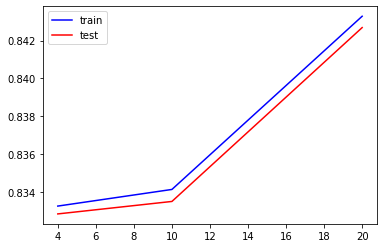

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import matplotlib.pyplot as plt

n_estimators = [4, 10, 20]
train_score_list = []
test_score_list = []
for n in n_estimators:
  start_time = time.time()
  model = GradientBoostingClassifier(random_state=318, n_estimators=n, verbose=3)
  print(f'fitting {n} estimators')
  model.fit(X,y)
  train_score = model.score(X, y)
  train_score_list.append(train_score)
  print(f'train score: {train_score}')
  test_score = model.score(X_test, y_test)
  test_score_list.append(test_score)
  print(f'test score: {test_score}')
  print(f'took {(time.time()-start_time)/60:.2f}min')

plt.figure()
plt.plot(n_estimators, train_score_list, color='blue', label='train')
plt.plot(n_estimators, test_score_list, color='red', label='test')
plt.legend()
plt.show()

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# load data
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [5, 10, 20, 50, 100]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv=5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X, y)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 157.3min


In [ ]:
grid search did not finish

## run smaller batches to tune



### max_depth on google colab

In [ ]:
import timeit, os
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

# import data
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'

# load array
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')
# print the array
print(X.shape)

# set up time
start_time_all = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time_all)/60:.2f} min')
# hyperparameters
n_estimators = 20
max_depth_list = [3, 7, 9]
# declare output var
test_scores = []
train_scores = []
# test hyperparameter
for max_depth in max_depth_list:
    print(f'running {max_depth}')
    # set up time
    start_time = timeit.timeit()
    # start model
    NN_model = GradientBoostingClassifier(max_depth=max_depth)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    test_score = NN_model.score(X_test, y_test)
    # print results
    print(f"\tTrain Score: {train_score}")
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(timeit.timeit() - start_time)/60:.2f} min')

# set up time
start_time_all = timeit.timeit()
print(f'total time: {(timeit.timeit() - start_time_all)/60:.2f} min')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(1600000, 21)
timer start
test timer -0.00 min
running 3
	Train Score: 0.87604375
	Test Score: 0.875275
	took 0.00 min
running 7
	Train Score: 0.89990375
	Test Score: 0.896415
	took 0.00 min
running 9
	Train Score: 0.913314375
	Test Score: 0.90374
	took 0.00 min
total time: -0.00 min


seems max_depth=9 is the best. See if higher can be better.


## max_depth 9 and more

In [ ]:
import time, os
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set up time
session_start = time.time()
print('timer start')
print(f'test timer {(time.time() - session_start)/60:.2f} min')
# hyperparameters - testing
max_depth_list = np.arange(9,20,dtype=int)
hyperparameter_list = max_depth_list
hyperparameter_name = 'max_depth_list'
# hyperparameters - determined
n_estimators = 20
# declare output var
train_score_list = []
test_score_list = []
# test hyperparameter
for max_depth in max_depth_list:
    print(f'running {max_depth}')
    # set up time
    start_time = time.time()
    # start model
    NN_model = GradientBoostingClassifier(max_depth=max_depth)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    print(f"\tTrain Score: {train_score}")
    train_score_list.append(train_score)
    test_score = NN_model.score(X_test, y_test)
    print(f"\tTest Score: {test_score}")
    test_score_list.append(test_score)
    # print time elapsed
    print(f'\ttook {(time.time() - start_time)/60:.2f} min')

# report total time
print(f'total time: {(time.time() - session_start)/60:.2f} min')

# plot 
plt.figure()
plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
plt.xlabel(hyperparameter_name)
plt.ylabel('accuracy score')
plt.legend()
plt.show()

timer start
test timer 26543516.13 min
running 9
	Train Score: 0.913315
	Test Score: 0.9037325
	took 51.91 min
running 10
	Train Score: 0.923209375
	Test Score: 0.907465
	took 59.90 min
running 11
	Train Score: 0.9347825
	Test Score: 0.9103975
	took 69.34 min
running 12
	Train Score: 0.949330625
	Test Score: 0.911925
	took 73.38 min
running 13


the run did not finish, but seems like higher max_depth is better. Overfitting increases by 0.1% as each max_depth increase. Each max_depth increase also increase run time by about 10 mins.

## loss type

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
loss = ['deviance', 'exponential']
hyperparameter_list = loss.copy()
hyperparameter_name = 'loss'
# hyperparameters - to test
learning_rate = 0.1
min_samples_leaf = 1
subsample = 1.0
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
warm_start = False
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
# hyperparameters - determined / to fine tune
n_estimators = 20
verbose = 1
random_state = 318
max_depth = 4 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} - {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, n_estimators=n_estimators,
                random_state=random_state, max_depth=max_depth,
                loss=parameter, 
                learning_rate=learning_rate, 
                subsample=subsample, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_features=max_features, 
                max_leaf_nodes=max_leaf_nodes, warm_start=warm_start, 
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)

timer starts
running: loss - deviance
      Iter       Train Loss   Remaining Time 
         1           1.2904            6.24m
         2           1.2114            5.94m
         3           1.1456            5.16m
         4           1.0893            4.65m
         5           1.0421            4.28m
         6           1.0015            4.01m
         7           0.9657            3.81m
         8           0.9353            3.41m
         9           0.9093            3.06m
        10           0.8845            2.70m
        20           0.7480            0.00s
	Train Score: 		0.851968125
	Test Score: 		0.85136
	Overfit (train - test): 		 0.0006081249999999594
	elapsed time 5.312 min
running: loss - exponential
      Iter       Train Loss   Remaining Time 
         1           0.9520            6.78m
         2           0.9098            5.16m
         3           0.8730            4.95m
         4           0.8403            5.02m
         5           0.8119            4.6

NameError: name 'hyperparameterplot' is not defined

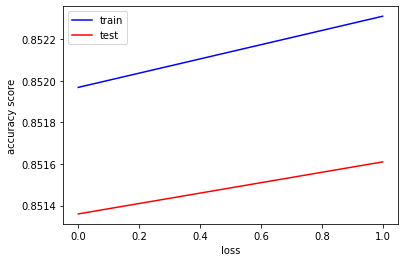

loss = ['deviance', 'exponential']
train_acc = [0.851968125, 0.85231]
test_acc = [0.85136, 0.85161]
time per param = [318.69321179389954, 537.5090651512146]


In [15]:
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')

exponential is slightly better but also slighty overfitting and takes almost double the time to run. The gain is not worth the cost. Keep it with deviance.

## Learning rate
* learning rate
* subsample
* max_depth


timer starts
running: learning_rate - 0.0001
      Iter       Train Loss   Remaining Time 
         1           1.3862            6.17m
         2           1.3861            5.17m
         3           1.3860            4.64m
         4           1.3859            4.39m
         5           1.3858            4.14m
         6           1.3857            3.77m
         7           1.3856            3.44m
         8           1.3855            3.13m
         9           1.3854            2.84m
        10           1.3853            2.57m
        20           1.3843            0.00s
	Train Score: 		0.8325525
	Test Score: 		0.8320525
	Overfit (train - test): 	0.000500000000000056
	elapsed time 5.009 min
running: learning_rate - 0.001
      Iter       Train Loss   Remaining Time 
         1           1.3853            4.73m
         2           1.3843            4.27m
         3           1.3833            4.03m
         4           1.3823            3.81m
         5           1.3813        

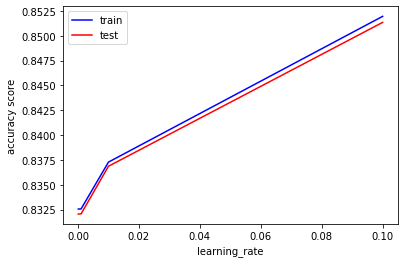

learning_rate = [0.0001, 0.001, 0.01, 0.1]
train_acc = [0.8325525, 0.83255875, 0.837280625, 0.851968125]
test_acc = [0.8320525, 0.83206, 0.8368625, 0.85136]
time per param = [300.52885484695435, 278.91072392463684, 319.55347776412964, 285.89070987701416]


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
learning_rate = [0.0001, 0.001, 0.01, 0.1]
hyperparameter_list = learning_rate.copy()
hyperparameter_name = 'learning_rate'
# hyperparameters - to test
subsample = 1.0
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
warm_start = False
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
# hyperparameters - determined - can tune further
n_estimators = 20
max_depth = 4 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing
# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} - {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, n_estimators=n_estimators,
                random_state=random_state, max_depth=max_depth, loss=loss, 
                learning_rate=parameter, 
                subsample=subsample, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_features=max_features, 
                max_leaf_nodes=max_leaf_nodes, warm_start=warm_start, 
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')

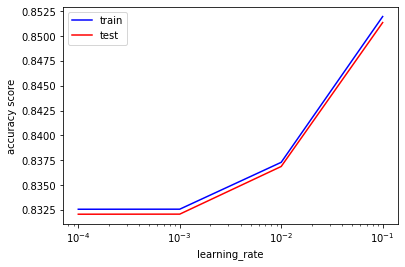

In [3]:
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name,'log')


## subsample - stochastic gradient boosting

timer starts
running: subsample - 1.0
      Iter       Train Loss   Remaining Time 
         1           1.2904            6.17m
         2           1.2114            5.69m
         3           1.1456            5.30m
         4           1.0893            4.99m
         5           1.0421            4.72m
         6           1.0015            4.57m
         7           0.9657            4.38m
         8           0.9353            4.09m
         9           0.9093            3.78m
        10           0.8845            3.46m
        20           0.7480            0.00s
	Train Score: 		0.851968125
	Test Score: 		0.85136
	Overfit (train - test): 	0.0006081249999999594
	elapsed time 6.101 min
running: subsample - 0.8
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2904           0.0958            4.03m
         2           1.2115           0.0785            4.01m
         3           1.1452           0.0664            3.75m
         4           1.0

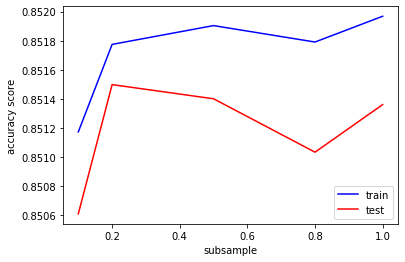

subsample = [1.0, 0.8, 0.5, 0.2, 0.1]
train_acc = [0.851968125, 0.851790625, 0.85190375, 0.851774375, 0.851171875]
test_acc = [0.85136, 0.8510325, 0.8514, 0.8514975, 0.8506075]
time per param = [366.05360412597656, 276.88686060905457, 194.4705090522766, 71.95063400268555, 48.08454489707947]


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
subsample = [1.0, 0.8, 0.5, 0.2, 0.1]
hyperparameter_list = subsample.copy()
hyperparameter_name = 'subsample'
# hyperparameters - to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False
# hyperparameters - determined - can tune further
learning_rate = 0.1 # max tested 0.1 can be more
n_estimators = 20
max_depth = 4 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing
# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} = {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, n_estimators=n_estimators,
                random_state=random_state, max_depth=max_depth, loss=loss, 
                learning_rate=learning_rate, warm_start=warm_start,
                subsample=parameter, 
                criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_features=max_features, 
                max_leaf_nodes=max_leaf_nodes,  
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')

In [5]:
print(model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=318, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)


0.2 subsample is pretty good. least overfit. can tune from 0.99 to 0.59.

## run one optmized model to see if it beats accuracy of other models


timer starts
running: max_depth = 13
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2581           0.1223           19.85m
         2           1.1534           0.0998           18.02m
         3           1.0656           0.0839           15.54m
         4           0.9905           0.0708           14.33m
         5           0.9262           0.0600           13.31m
         6           0.8704           0.0515           12.34m
         7           0.8220           0.0445           11.25m
         8           0.7796           0.0387           10.47m
         9           0.7427           0.0336            9.71m
        10           0.7092           0.0292            8.82m
        20           0.5178           0.0090            0.00s
	Train Score: 		0.9191175
	Test Score: 		0.8936975
	Overfit (train - test): 	0.025419999999999998
	elapsed time 17.506 min
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                

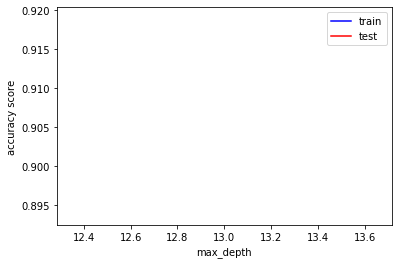

max_depth = [13]
train_acc = [0.9191175]
test_acc = [0.8936975]
time per param = [1050.332139968872]


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
max_depth = [13] # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing
hyperparameter_list = max_depth.copy()
hyperparameter_name = 'max_depth'
# hyperparameters - to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False
# hyperparameters - determined - can tune further
subsample = 0.8 # can tune between 0.99 to 0.5
learning_rate = 0.1 # max tested 0.1 can be more
n_estimators = 20
# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} = {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, random_state=random_state, 
                warm_start=warm_start, loss=loss, 
                max_depth=parameter, 
                n_estimators=n_estimators,
                learning_rate=learning_rate, 
                subsample=subsample, 
                max_features=max_features, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_leaf_nodes=max_leaf_nodes,  
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


## n_estimators > 20


timer starts
running: n_estimators = 20
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2935           0.0927            3.04m
         2           1.2176           0.0757            2.89m
         3           1.1544           0.0634            2.73m
         4           1.1014           0.0530            2.57m
         5           1.0561           0.0448            2.41m
         6           1.0179           0.0383            2.25m
         7           0.9843           0.0331            2.10m
         8           0.9558           0.0289            1.95m
         9           0.9315           0.0246            1.80m
        10           0.9092           0.0217            1.63m
        20           0.7835           0.0085            0.00s
	Train Score: 		0.842906875
	Test Score: 		0.8422925
	Overfit (train - test): 	0.0006143750000000558
	elapsed time 3.310 min
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           

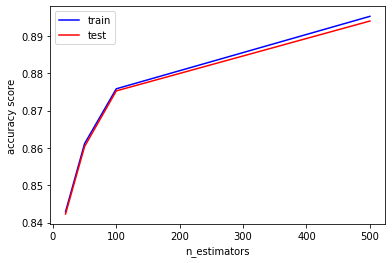

n_estimators = [20, 50, 100, 500]
train_acc = [0.842906875, 0.861149375, 0.875848125, 0.89527]
test_acc = [0.8422925, 0.8603675, 0.8752875, 0.8940125]
time per param = [198.62490916252136, 511.67069578170776, 975.2452917098999, 5114.979475975037]


In [2]:

from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
n_estimators = [20, 50, 100, 500]
hyperparameter_list = n_estimators.copy()
hyperparameter_name = 'n_estimators'
# hyperparameters - to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False
# hyperparameters - determined - can tune further
subsample = 0.8 # can tune between 0.99 to 0.5
learning_rate = 0.1 # max tested 0.1 can be more
max_depth = 3 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing

# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} = {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, random_state=random_state, 
                warm_start=warm_start, loss=loss, 
                max_depth=max_depth, 
                n_estimators=parameter,
                learning_rate=learning_rate, 
                subsample=subsample, 
                max_features=max_features, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_leaf_nodes=max_leaf_nodes,  
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


n_estimators = 500 is the best, and seems like the gain continues to increase.

In [7]:
np.array([198.62490916252136, 511.67069578170776, 975.2452917098999, 5114.979475975037])/60

array([ 3.31041515,  8.52784493, 16.2540882 , 85.24965793])

## GridCV

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from brainstation_capstone.ml.toolbox.mlSOP import GridSearchCVSOP
# hyperparameters not included -------------
# hyperparameters - determined - can tune further
n_estimators = 500 # this is the best, and possibly better if more, but takes 1.5 hours to run
# hyperparameters - left to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False
# hyperparameters not included -------------


# define dictionary for grid search
grid = dict(learning_rate = np.arange(0.1, 0.5, 0.1), 
            n_estimators = [100], 
            subsample = np.arange(0.2, 1, 0.2), # 0.2 was best. tune
            max_depth = np.arange(10, 15, 1),
            random_state = [318],
            loss = ['deviance'])
model = GradientBoostingClassifier()
grid_search = GridSearchCVSOP(model, grid)
grid_search.run(data['X_train'], data['y_train'])
means, std, params = grid_search.print_result()

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 307.1min


KeyboardInterrupt: 

running overnight on above code stil not done.

## see if higher learning_rate gets better (from > 0.1)

timer starts
running: learning_rate = 0.1
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2904           0.0958           22.23m
         2           1.2115           0.0785           21.48m
         3           1.1452           0.0664           20.96m
         4           1.0898           0.0555           20.60m
         5           1.0411           0.0480           20.31m
         6           1.0004           0.0407           20.05m
         7           0.9660           0.0340           19.79m
         8           0.9351           0.0311           19.54m
         9           0.9076           0.0277           19.27m
        10           0.8851           0.0220           19.13m
        20           0.7472           0.0099           17.77m
        30           0.6843           0.0062           15.94m
        40           0.6475           0.0028           13.92m
        50           0.6242           0.0018           11.61m
        60           0.6075

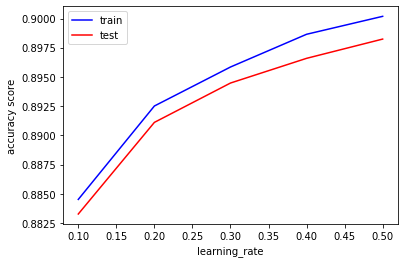

learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
train_acc = [0.884525625, 0.892515625, 0.895850625, 0.898650625, 0.900185]
test_acc = [0.8832775, 0.891115, 0.89448, 0.8965925, 0.89824]
time per param = [1378.2874710559845, 1353.206779241562, 1329.5374431610107, 1379.984885931015, 1324.7723278999329]


In [4]:

from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]  # max tested 0.1 can be more (There is a trade-off between learning_rate and n_estimators)
hyperparameter_list = learning_rate.copy()
hyperparameter_name = 'learning_rate'
# hyperparameters - determined - can tune further
subsample = 0.8 # can tune between 0.99 to 0.5
max_depth = 4 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing
n_estimators = 100 # more better, but takes a lot more time.
# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'
# hyperparameters - to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False


# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} = {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, random_state=random_state, 
                warm_start=warm_start, loss=loss, 
                max_depth=max_depth, n_estimators=n_estimators,
                learning_rate=parameter, 
                subsample=subsample, 
                max_features=max_features, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_leaf_nodes=max_leaf_nodes,  
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


higher learning rate does better. try learning rate higher than 0.5

## try learnin_rate 0.6-0.9

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
# hyperparameters - testing
learning_rate = np.arange(0.6, 1, 0.1)  # max tested 0.1 can be more (There is a trade-off between learning_rate and n_estimators)
hyperparameter_list = learning_rate.copy()
hyperparameter_name = 'learning_rate'
# hyperparameters - determined - can tune further
subsample = 0.8 # can tune between 0.99 to 0.5
max_depth = 4 # 9 or more can be better, but to limit time spend on tuning others, keep this low when testing
n_estimators = 100 # more better, but takes a lot more time.
# hyperparameters - determined - no further tuning
verbose = 1
random_state = 318
loss = 'deviance'
# hyperparameters - to test
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
min_impurity_decrease = 0.0
min_impurity_split = None
init = None 
max_features = None 
max_leaf_nodes = None
validation_fraction = 0.1 
n_iter_no_change = None
tol = 1e-4 
ccp_alpha = 0.0
# hyperparameters - test - low priorty
criterion = 'friedman_mse' # generally best
warm_start = False


# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running: {hyperparameter_name} = {parameter}')
    timer.param_start()
    model = GradientBoostingClassifier(verbose=verbose, random_state=random_state, 
                warm_start=warm_start, loss=loss, 
                max_depth=max_depth, n_estimators=n_estimators,
                learning_rate=parameter, 
                subsample=subsample, 
                max_features=max_features, criterion=criterion,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                min_weight_fraction_leaf=min_weight_fraction_leaf, 
                min_impurity_decrease=min_impurity_decrease, 
                min_impurity_split=min_impurity_split, init=init, 
                max_leaf_nodes=max_leaf_nodes,  
                validation_fraction=validation_fraction, 
                n_iter_no_change=n_iter_no_change, tol=tol, ccp_alpha=ccp_alpha
                )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


## see if increasing max_depth to 15 gets better

## look into trade off between learning_rate and n_estimators
